In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import All the Libraries

In [2]:
# import all the required libraries and modules
import numpy as np
import pandas as pd
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
import string
punctuations=list(string.punctuation)
stop=stop+punctuations
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Collection and Preprocessing

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/tweet_emotions.csv')

In [4]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
#Check if there are any null values
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [7]:
#Checking datatypes of the columns
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [8]:
#Dropping the unwanted columns
df = df.drop(columns=['tweet_id'])

In [9]:
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [10]:
#Checking duplicate values
duplicates_count = df.duplicated().sum()
print("Duplicate values : ", duplicates_count)

Duplicate values :  91


In [11]:
df[df['content'].duplicated() == True]

,sentiment,content
366,worry,I feel so deflated. No more doggy.
521,worry,Somebody please save the polar bears!
1026,neutral,I'm at work
3684,sadness,@dublins98dave me too! I am down 400 euro
4363,worry,"is upset, I left my phone at home again"
...,...,...
39859,love,Happy Mothers Day
39898,love,happy mothers day!
39913,happiness,happy mother's day!
39915,love,happy mother's day everyone


In [12]:
#Drop duplicates
index = df[df['content'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [13]:
#Checking duplicate values
duplicates_count = df.duplicated().sum()
print("Duplicate values : ", duplicates_count)

Duplicate values :  0


In [14]:
df.shape

(39827, 2)

In [15]:
# Unique values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [16]:
# Frequency distribution of'sentiment'
frequency_counts = df['sentiment'].value_counts()

frequency_percentage = (frequency_counts / len(df['sentiment'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Print total value
cardinality = df['sentiment'].nunique()
print(f"\ntotal values: {cardinality}")

            Counts  Percentage
neutral       8598   21.588370
worry         8437   21.184121
happiness     5184   13.016295
sadness       5154   12.940970
love          3785    9.503603
surprise      2181    5.476184
fun           1775    4.456776
relief        1522    3.821528
hate          1322    3.319356
empty          822    2.063926
enthusiasm     758    1.903231
boredom        179    0.449444
anger          110    0.276195

total values: 13


In [17]:
# tokenize the string and convert into matrix
tokenizer = Tokenizer(num_words=2000, split=" ")
tokenizer.fit_on_texts(df['content'].values)

X= tokenizer.texts_to_sequences(df['content'].values)
X = pad_sequences(X)

In [18]:
# one hot encoding the labels
Y = pd.get_dummies(df['sentiment']).values
#  divide into training and testing data
import sklearn
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y,random_state=1)

#Data Visualization

Text(0.5, 1.0, 'Emotion Distribution')

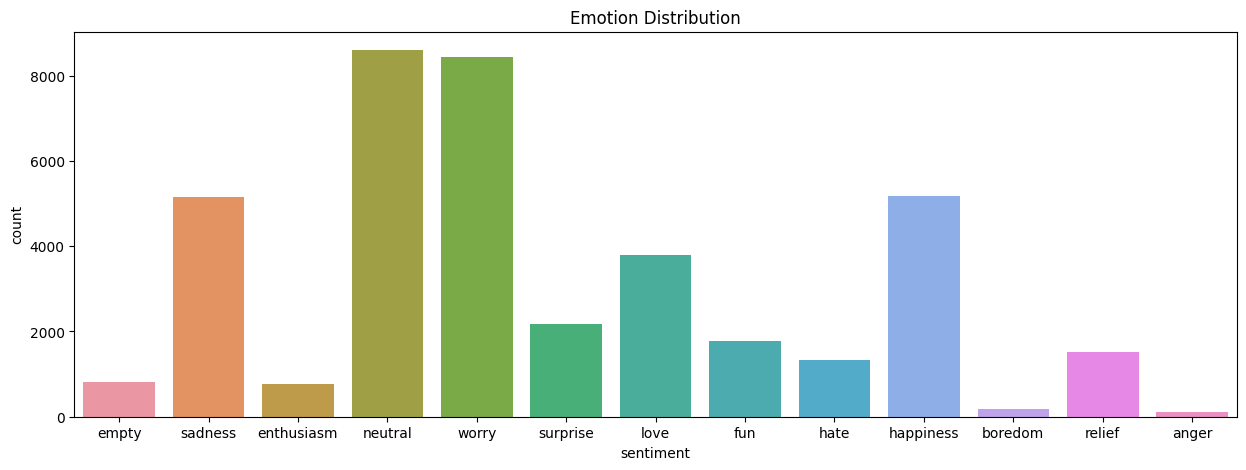

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='sentiment', data=df)
plt.title('Emotion Distribution')

In [20]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [21]:
df['word count'] = df['content'].apply(no_of_words)

In [22]:
df.head()

,sentiment,content,word count
0,empty,@tiffanylue i know i was listenin to bad habi...,18
1,sadness,Layin n bed with a headache ughhhh...waitin o...,10
2,sadness,Funeral ceremony...gloomy friday...,3
3,enthusiasm,wants to hang out with friends SOON!,7
4,neutral,@dannycastillo We want to trade with someone w...,15


In [23]:
def remove_special_characters(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove special characters using regular expressions, keeping only alphanumeric characters
    clean_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words]

    # Join the words back into a sentence
    clean_text = ' '.join(clean_words)
    return clean_text

# Apply the function to the 'text' column in the DataFrame
df['content'] = df['content'].apply(remove_special_characters)

In [24]:
df.head()

,sentiment,content,word count
0,empty,tiffanylue i know i was listenin to bad habit...,18
1,sadness,Layin n bed with a headache ughhhh waitin on ...,10
2,sadness,Funeral ceremony gloomy friday,3
3,enthusiasm,wants to hang out with friends SOON,7
4,neutral,dannycastillo We want to trade with someone w...,15


In [25]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [26]:
df.content = df['content'].apply(lambda x: stemming(x))

In [27]:
df['word count'] = df['content'].apply(no_of_words)
df.head()

,sentiment,content,word count
0,empty,tiffanylue i know i was listenin to bad habit...,17
1,sadness,Layin n bed with a headache ughhhh waitin on ...,11
2,sadness,Funeral ceremony gloomy friday,4
3,enthusiasm,wants to hang out with friends SOON,7
4,neutral,dannycastillo We want to trade with someone w...,15


#Model Development

In [28]:
model = Sequential()
model.add(Embedding(2000, 256, input_length=X_train.shape[1]))
model.add(Dropout(0.2))  # Adjusted dropout rate
model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))  # Reduced LSTM units
model.add(Dropout(0.2))  # Adjusted dropout rate
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))  # Reduced LSTM units
model.add(Dense(13, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 256)           512000    
                                                                 
 dropout (Dropout)           (None, 35, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 35, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 35, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                                 
Total params: 842381 (3.21 MB)
Trainable params: 842381 

In [29]:
df.content[47], df.sentiment[47]

('I m having a problem with my photo here in twitter amf     ca nt see my face ',
 'sadness')

In [33]:
# train the model on training data
batch_size = 80
epochs = 15

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/15
374/374 - 166s - loss: 0.8597 - accuracy: 0.7010 - 166s/epoch - 444ms/step
Epoch 2/15
374/374 - 153s - loss: 0.8450 - accuracy: 0.7052 - 153s/epoch - 409ms/step
Epoch 3/15
374/374 - 165s - loss: 0.8328 - accuracy: 0.7113 - 165s/epoch - 442ms/step
Epoch 4/15
374/374 - 150s - loss: 0.8252 - accuracy: 0.7118 - 150s/epoch - 400ms/step
Epoch 5/15
374/374 - 153s - loss: 0.8187 - accuracy: 0.7148 - 153s/epoch - 409ms/step
Epoch 6/15
374/374 - 149s - loss: 0.8075 - accuracy: 0.7181 - 149s/epoch - 398ms/step
Epoch 7/15
374/374 - 150s - loss: 0.8047 - accuracy: 0.7196 - 150s/epoch - 401ms/step
Epoch 8/15
374/374 - 148s - loss: 0.7897 - accuracy: 0.7228 - 148s/epoch - 395ms/step
Epoch 9/15
374/374 - 154s - loss: 0.7967 - accuracy: 0.7225 - 154s/epoch - 411ms/step
Epoch 10/15
374/374 - 160s - loss: 0.7858 - accuracy: 0.7260 - 160s/epoch - 427ms/step
Epoch 11/15
374/374 - 154s - loss: 0.7749 - accuracy: 0.7279 - 154s/epoch - 411ms/step
Epoch 12/15
374/374 - 152s - loss: 0.7720 - accuracy

#Model evaluation and testing

In [31]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)

312/312 [==============================] - 47s 148ms/step - loss: 1.9068 - accuracy: 0.3550


In [32]:
score

[1.9067598581314087, 0.35502660274505615]

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

312/312 [==============================] - 53s 170ms/step - loss: 1.9068 - accuracy: 0.3550
Test loss: 1.9067598581314087
Test accuracy: 0.35502660274505615


In [35]:
import random

In [40]:
i=random.randint(0, len(df['sentiment'])-1)
print('Sentence : ',df['content'][i])
print('Emotion : ', df['sentiment'][i])

Sentence :  at home with her fam see you in CoMo tomorrow 
Emotion :  happiness
